# PROJECT:- NOISE REMOVAL IMAGE FROM IMAGE   (MNIST DATASET)


### What is Mnist Dataset?
#### Answer:-1.  MNIST is short for Modified National Institute of Standards and Technology database.
#### 2. The MNIST dataset is a large database of handwritten digits. It commonly used for training various image processing systems. 
#### 3. The MNIST database of handwritten digits consists of a training set of 60,000 examples, and a test set of 10,000 examples. 
#### 4. It is a subset of a larger set available from NIST. Additionally, the black and white images from NIST were size-normalized and centered to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.



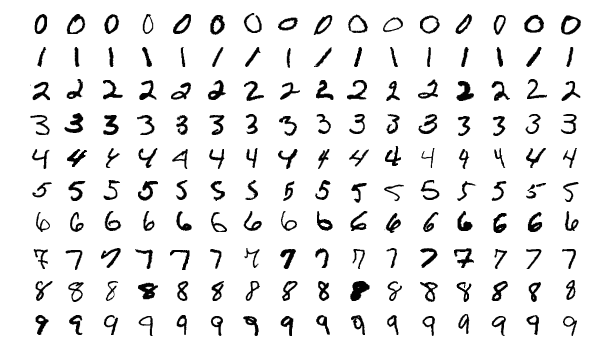

### What is Noise?
#### Answer:- Image noise usually manifests itself as random speckles on a smooth surface and it can seriously affect the quality of the image.


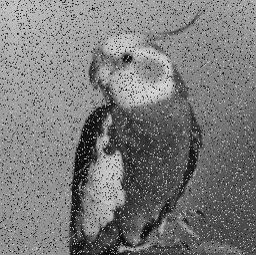

### What is KKM Model?
#### Answer:- 1.K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.
####          2.K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.
####          3.K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.
####          4.K-NN algorithm can be used for Regression as well as for Classification but mostly it is used for the Classification problems.
####          5.It is also called a lazy learner algorithm because it does not learn from the training set immediately instead it stores the dataset and at the time of classification, it performs an action on the dataset.
####          6.KNN algorithm at the training phase just stores the dataset and when it gets new data, then it classifies that data into a category that is much similar to the new data.


### ACCURACY
##### Model accuracy is: 95% 

## Let's get started!


## Import Dependencies

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Download Mnist dataset by using sklearn function
#### code:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')


## Saving mnist dataset into local file by using joblib library
#### code:
import joblib

joblib.dump(mnist,'mnist_datasets_joblib')

## load Mnist dataset from local file

In [7]:
# load the dataset in Jupyter Notebook
# first we shall import joblib
import joblib
mj=joblib.load('mnist_datasets_joblib')

## Features of Mnist Dataset

In [6]:
dir(mj)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

## data and target in x, y variable

In [39]:
x,y=mj['data'],mj['target']

In [40]:
x.shape

(70000, 784)

In [41]:
y.shape

(70000,)

## to view of image of a single digit and reshapping (28,28) and display by using imshow function

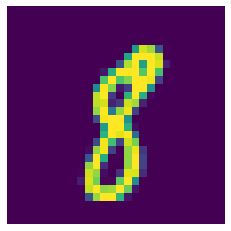

In [42]:
import matplotlib
some_digit = x.to_numpy()[300]
some_digit_image = some_digit.reshape(28, 28)  # let's reshape to plot it

plt.imshow(some_digit_image)
plt.axis("off")
plt.show()

## split data into training set(60000) and testing set(10000)

In [11]:
# split the data into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y,test_size= 1/7.0)




In [12]:
len(x_train)

60000

In [13]:
len(x_test)

10000

## Shuffle our training data
We need to shuffle our training data so that it ensures that we don't miss out any digit in a cross validation fold.

In [14]:
#np.random.seed(42)
shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train.iloc[shuffle_index], y_train.iloc[shuffle_index]

In [15]:
len(y_train)

60000

In [16]:
len(y_test)

10000

##  KNN take a lot of time on training and testing data. So, we are doing trimming

In [17]:
x_train = x_train[:30000]
y_train = y_train[:30000]

x_test = x_test[:5000]
y_test = y_test[:5000]




In [18]:
len(x_train)

30000

In [19]:
len(x_test)

5000

## Add noise in train and test dataset

In [87]:
noise_train=np.random.randint(0,100,(len(x_train),784))
x_train_mod=x_train+noise_train
noise_test=np.random.randint(0,100,(len(x_test),784))
x_test_mod=x_test+noise_test

y_train_mod=x_train
y_test_mod=x_test


## View the noisy image 

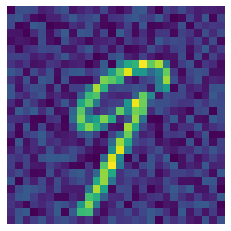

In [88]:
some_digit1 = x_train_mod.to_numpy()[8]
some_digit_image1 = some_digit1.reshape(28, 28)  # let's reshape to plot it

plt.imshow(some_digit_image1)
plt.axis("off")
plt.show()

## We need clean the image  by using KNN Model

In [89]:
# classifying with noise
from sklearn.neighbors import KNeighborsClassifier 
knn_clf= KNeighborsClassifier()  
knn_clf.fit(x_train_mod, y_train) 

KNeighborsClassifier()

In [90]:
# cleaning of the noise using knn model
from sklearn.neighbors import KNeighborsClassifier 
knn_clf1= KNeighborsClassifier()  
knn_clf1.fit(x_train_mod, y_train_mod)  

KNeighborsClassifier()

## prediction on x_test_mod(noisy image)

In [91]:
y_predict=knn_clf.predict(x_test_mod)

In [95]:
# find accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9598

## View Noisy Image

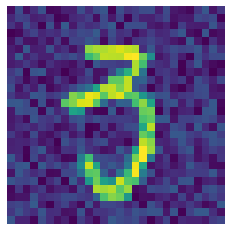

In [93]:
some_digit1 = x_test_mod.to_numpy()[250]
some_digit_image1 = some_digit1.reshape(28, 28)  # let's reshape to plot it
  
plt.imshow(some_digit_image1)
plt.axis("off")
plt.show()

## Image after Noise Removal 

In [92]:
y_pre=knn_clf1.predict(x_test_mod)

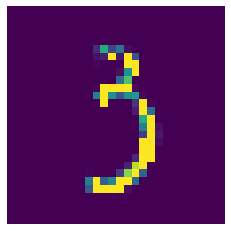

In [94]:
plt.imshow((np.asarray(y_pre[250]).reshape(28,28)))
plt.axis("off")
plt.show()

## Conclusion:
1. Using Scikit learn healper function downloaded popular datasets. Mnist is one of them.
2. Using Matplotlib's imshow function viewed the image of 28x28 array single digit. 
3. We split our data into tran and test. Although Mnist dataset is already split into a traning set(60,000 images) and testing set(10,000 images).
4. We shuffle our traning data to ensures that we don't miss out any digit in a cross validation fold.
5. KNN Classifier take a lot of time, we did trimming (i.e. traning set(30,000 images) and testing set(5,000 images).).

7. We cleaned the image by using KNN Classifier. It was an example of Multioutput classification. A Single Label is Multilabel as it has 784 classes and each of the 784 pixel can have values from 0 to 255, hence it was a Multioutput classification.

6. Output:- Displayed as required using KNN Classifier 

   Image after noise removal
   
     and
     
   image before noise removal  
